In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt

def read_flo_file(fn):
    """ Read .flo file in Middlebury format"""
    # Code adapted from:
    # http://stackoverflow.com/questions/28013200/reading-middlebury-flow-files-with-python-bytes-array-numpy

    # WARNING: this will work on little-endian architectures (eg Intel x86) only!
    # print 'fn = %s'%(fn)
    with open(fn, 'rb') as f:
        magic = np.fromfile(f, np.float32, count=1)
        if 202021.25 != magic:
            print('Magic number incorrect. Invalid .flo file')
            return None
        else:
            w = np.fromfile(f, np.int32, count=1)
            h = np.fromfile(f, np.int32, count=1)
            # print 'Reading %d x %d flo file\n' % (w, h)
            data = np.fromfile(f, np.float32, count=2*int(w)*int(h))
            # Reshape data into 3D array (columns, rows, bands)
            # The reshape here is for visualization, the original code is (w,h,2)
            return np.resize(data, (int(h), int(w), 2))


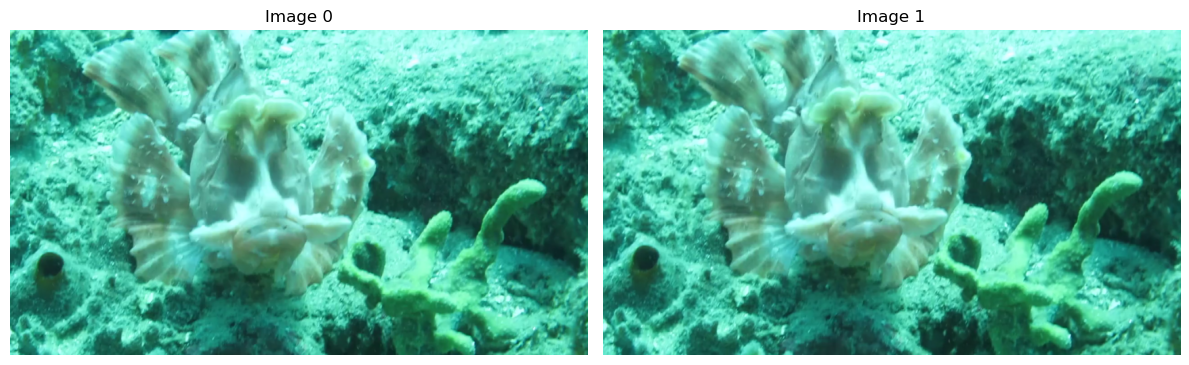

In [37]:
from PIL import Image
import matplotlib.pyplot as plt

# Paths to your images
image_path1 = '/data/group_data/neuroagents_lab/training_datasets/zfa_pretraining_data/processed/MarineVideoKit/test/Ambon_Apr2012_0008/frame_000000000000.png'
image_path2 = '/data/group_data/neuroagents_lab/training_datasets/zfa_pretraining_data/processed/MarineVideoKit/test/Ambon_Apr2012_0008/frame_000000000001.png'

# Load the images
image1 = Image.open(image_path1)
image2 = Image.open(image_path2)

# Display the images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image1)
axes[0].axis('off')
axes[0].set_title('Image 0')

axes[1].imshow(image2)
axes[1].axis('off')
axes[1].set_title('Image 1')

plt.tight_layout()
plt.show()


In [38]:
flo_filename = '/data/group_data/neuroagents_lab/training_datasets/zfa_pretraining_data/processed/MarineVideoKit/processed/MarineVideoKit_flows/test/Ambon_Apr2012_0008/flow_000000000000.flo'

# Read and visualize the .flo file
flow_data = read_flo_file(flo_filename)
flow_data

/tmp/ipykernel_3230131/937865140.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data = np.fromfile(f, np.float32, count=2*int(w)*int(h))
/tmp/ipykernel_3230131/937865140.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return np.resize(data, (int(h), int(w), 2))


array([[[  3.1573505, -10.061314 ],
        [  3.1794589, -10.045361 ],
        [  3.1857402, -10.03935  ],
        ...,
        [  5.1420956, -11.929467 ],
        [  5.137206 , -11.940027 ],
        [  5.1351213, -11.953312 ]],

       [[  3.1564455, -10.050056 ],
        [  3.1763039, -10.040077 ],
        [  3.1858044, -10.031645 ],
        ...,
        [  5.145179 , -11.933909 ],
        [  5.1434555, -11.943628 ],
        [  5.146016 , -11.945021 ]],

       [[  3.1529446, -10.04602  ],
        [  3.1678822, -10.03325  ],
        [  3.1791847, -10.022075 ],
        ...,
        [  5.141466 , -11.938158 ],
        [  5.143833 , -11.944532 ],
        [  5.148774 , -11.94577  ]],

       ...,

       [[  3.7280219, -10.222562 ],
        [  3.728496 , -10.218288 ],
        [  3.7281494, -10.214531 ],
        ...,
        [  4.810859 , -10.766573 ],
        [  4.8123493, -10.782038 ],
        [  4.813753 , -10.796556 ]],

       [[  3.7257519, -10.224886 ],
        [  3.7266703, -10.2

In [40]:
h = flow_data.shape[0]
w = flow_data.shape[1]

print(f' Size: {h}x{w}')

 Size: 480x853
